# Empirical Distribution Function

This code illustates the concept of the empirical distribution function. Recall that it is defined as the cdf that puts mass $1/n$ at each data point $X_i$. Formally,
$$
\hat F_n(x) = \frac{1}{n} \sum_{i = 1}^n I(X_i \leq x),
$$
where
$$
I(X_i \leq x) = \begin{cases}
1, & \text{if } X_i \leq x, \\
0 & \text{ otherwise.}
\end{cases}
$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon


Check what happens when the sample size $n$ increases.

[6.17269302e-04 4.31780292e-03 7.56278925e-03 8.47289109e-03
 1.00476582e-02 1.02331487e-02 1.07079900e-02 1.07331786e-02
 1.28640486e-02 1.48696300e-02 1.72100888e-02 1.76378356e-02
 1.92209211e-02 1.93858000e-02 2.12848310e-02 2.15237418e-02
 2.17175301e-02 2.18906623e-02 2.20171759e-02 2.26052660e-02
 2.30732809e-02 2.33846201e-02 2.57950151e-02 2.58531281e-02
 2.69561146e-02 2.85001180e-02 3.03465595e-02 3.09473075e-02
 3.14189731e-02 3.18962289e-02 3.19406323e-02 3.33002493e-02
 3.36474447e-02 3.67184711e-02 3.81661215e-02 3.83482971e-02
 3.86659555e-02 3.93224882e-02 4.02178051e-02 4.06933600e-02
 4.17738471e-02 4.30054742e-02 4.32445293e-02 4.37130622e-02
 4.40660463e-02 4.49586554e-02 4.54126987e-02 4.54384471e-02
 4.76210423e-02 4.86079918e-02 4.86564714e-02 4.96336247e-02
 4.97387149e-02 5.11589188e-02 5.28585231e-02 5.66166976e-02
 5.71074446e-02 5.77124328e-02 5.88535255e-02 5.92299697e-02
 6.03238202e-02 6.17455154e-02 6.53708869e-02 6.55725269e-02
 6.63238963e-02 6.638787

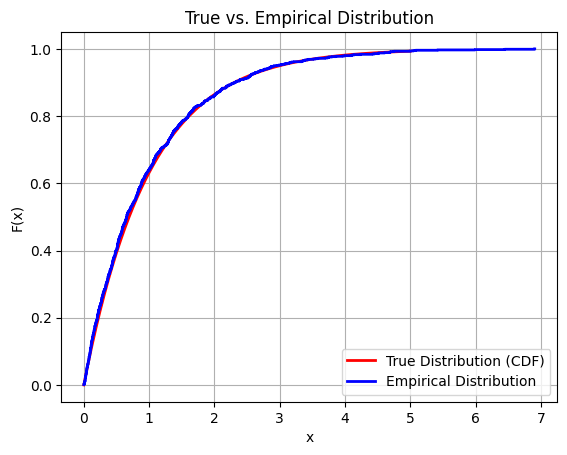

In [ ]:
# Fix the random seed for reproducibility
np.random.seed(45)

# Generate sample data from a standard normal distribution
sample_size = 1000
#samples = np.random.normal(loc=0, scale=1, size=sample_size)
samples = np.random.exponential(scale=1, size=sample_size)

# Sort the samples for plotting the empirical CDF
sorted_samples = np.sort(samples)
print(sorted_samples)

# Empirical CDF values: for n data points, the i-th sorted value corresponds
# to an empirical CDF value i/n
cdf_values = np.arange(1, sample_size + 1) / sample_size

# Prepare x-axis points to plot the true distribution CDF
x = np.linspace(0, 5, 400)

# Plot the true CDF (standard normal)
#plt.plot(x, norm.cdf(x), label='True Distribution (CDF)', color='red', linewidth=2)
plt.plot(x, expon.cdf(x), label='True Distribution (CDF)', color='red', linewidth=2)

# Plot the empirical CDF as a step function
plt.step(sorted_samples, cdf_values, label='Empirical Distribution', color='blue', linewidth=2, where='post')

# Add titles and labels
plt.title('True vs. Empirical Distribution')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# Bootstrapping the sample median.

We have a good estimator for the standard error of the sample mean:
$$
\widehat{SE(\overline X)} = \frac{S}{\sqrt{n}},
$$
where
$$
S^2 = \frac{1}{n - 1} \sum_{i = 1}^n (X_i - \overline X)^2.
$$
But what about the sample median? Typically, the answer depends on the distribution and even for large samples it is not straightforward to approximate it.

If $X_i$ are drawn from a distribution with continuous density $f(x)$, then the theoretical analysis can be used to show that a good estimator for the standard error of the sample median $m$ is
$$
\widehat{SE(m)} = \frac{1}{2 f(m)\sqrt{n}}.
$$
However the density is often not known and has to be estimated.

Instead, we can use the bootstrap to estimate the standard error by simulation.

In [ ]:
import numpy as np

In [ ]:
def bootstrap_median_se(X, B=1000):
    """
    X: array-like of data
    B: number of bootstrap resamples

    Returns:
        T: the median of the original sample
        se: the bootstrap standard error estimate for the median
    """
    X = np.array(X)
    n = len(X)

    # Original statistic
    T = np.median(X)

    # Bootstrap
    Tboot = np.zeros(B)
    for i in range(B):
        Xstar = np.random.choice(X, size=n, replace=True)
        Tboot[i] = np.median(Xstar)

    # Standard error
    se = np.sqrt(np.var(Tboot, ddof=1))

    return T, se

# Example dataset
X_example = [12, 15, 14, 10, 18, 15, 20, 17, 16, 15]

# Calculate median and standard error
T, se = bootstrap_median_se(X_example, B=1000)

print("Bootstrap Median:", T)
print("Standard Error:", se)

Bootstrap Median: 15.0
Standard Error: 0.8444815860332001


# An example that illustrate how to bootstrap the confidence interval for a measure of bio-equivalence.

This example is from Efron and Tibshirani (1993). When drug companies introduce new medications, they are sometimes required to show **bioequivalence**. This means that the new drug is not substantially different than the current treatment. Here are data on eight subjects who used medical patches to infuse a hormone into the blood. Each subject received three treatments: placebo, old-patch, new-patch.


As a measure of bioequivalence we use

$$
\theta = \frac{E \, Y}{E \, Z},
$$
where $Y = $ new -- old, and  $Z = $ old - placebo. The Food and Drug Administration (FDA) requirement for bioequivalence is that $|\theta| < 0.2$.

A natural estimator for $\theta$ is

$$
\widehat \theta = \frac{\overline Y}{\overline Z},
$$
and we need a confidence interval for this estimator.

Data:

| subject | placebo | old    | new    | old − placebo | new − old |
|--------:|--------:|-------:|-------:|-------------:|----------:|
|       1 |   9243  | 17649  | 16449  |         8406  |    -1200  |
|       2 |   9671  | 12013  | 14614  |         2342  |     2601  |
|       3 |  11792  | 19979  | 17274  |         8187  |    -2705  |
|       4 |  13357  | 21816  | 23798  |         8459  |     1982  |
|       5 |   9055  | 13850  | 12560  |         4795  |    -1290  |
|       6 |   6290  |  9806  | 10157  |         3516  |      351  |
|       7 |  12412  | 17208  | 16570  |         4796  |     -638  |
|       8 |  18806  | 29044  | 26325  |        10238  |    -2719  |

**Column meanings:**
1. **subject**: Subject identifier (1–8)  
2. **placebo**: Some observed value under the placebo condition  
3. **old**: Observed value under the “old” treatment  
4. **new**: Observed value under the “new” treatment  
5. **old − placebo**: Difference between columns “old” and “placebo”  
6. **new − old**: Difference between columns “new” and “old”

In [ ]:
import numpy as np

In [ ]:
# Given data (from the table)
# new − old (Y) for subjects 1..8
Y = np.array([
    -1200,  # subject 1
     2601,  # subject 2
    -2705,  # subject 3
     1982,  # subject 4
    -1290,  # subject 5
      351,  # subject 6
     -638,  # subject 7
    -2719   # subject 8
])

# old − placebo (Z) for subjects 1..8
Z = np.array([
     8406,  # subject 1
     2342,  # subject 2
     8187,  # subject 3
     8459,  # subject 4
     4795,  # subject 5
     3516,  # subject 6
     4796,  # subject 7
    10238   # subject 8
])

# 1) Compute the point estimate of theta = E[Y]/E[Z]
theta_hat = Y.mean() / Z.mean()
print(f"Point estimate of theta: {theta_hat:.4f}")

# 2) Bootstrap to obtain SE and CI

n = len(Y)        # sample size (8 subjects)
B = 10_000        # number of bootstrap resamples
boot_ratios = np.zeros(B)

# Generate B bootstrap resamples
for b in range(B):
    # Sample indices with replacement from {0,...,n-1}
    indices = np.random.randint(0, n, size=n)
    Y_star = Y[indices]
    Z_star = Z[indices]
    # Compute ratio for this resample
    boot_ratios[b] = Y_star.mean() / Z_star.mean()

# Standard error (sample standard deviation of the bootstrap distribution)
se_boot = boot_ratios.std(ddof=1)
print(f"Bootstrap standard error: {se_boot:.4f}")

# 3) Normal-approximation confidence interval for theta
#    95% CI: theta_hat +/- z_{alpha/2} * se_boot  (z_{0.025} ~ 1.96)
z_crit = 1.96
ci_lower = theta_hat - z_crit * se_boot
ci_upper = theta_hat + z_crit * se_boot
print(f"95% Normal CI: [{ci_lower:.4f}, {ci_upper:.4f}]")

# -- Percentile-based confidence interval --
alpha = 0.05
ci_lower_pct = np.percentile(boot_ratios, 100 * alpha/2)
ci_upper_pct = np.percentile(boot_ratios, 100 * (1 - alpha/2))

print(f"95% Percentile CI: [{ci_lower_pct:.4f}, {ci_upper_pct:.4f}]")


Point estimate of theta: -0.0713
Bootstrap standard error: 0.1010
95% Normal CI: [-0.2693, 0.1267]
95% Percentile CI: [-0.2294, 0.1587]


These intervals are not quite contained in $(-0.20,0.20)$ so at the 95 percent confidence level we have not demonstrated bioequivalence.